In [1]:
#import libraries
import seaborn as sns

from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt # plotting

import pandas as pd 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import shap
from imblearn.over_sampling import SMOTE

### Load Data

In [2]:
file1 = "/Users/ayadav/Downloads/term-deposit-marketing-2020.csv"

In [3]:
df = pd.read_csv(file1)

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [7]:
df.y.value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [8]:
df.shape

(40000, 14)

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

## Data Visualization

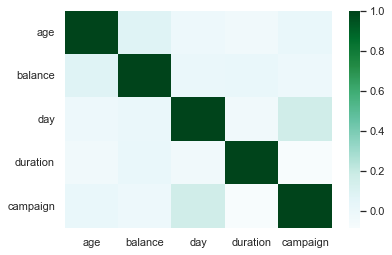

In [10]:
sns.heatmap(df.corr(), cmap='BuGn')

### to visualize all the columns in heatmap, need to label the categorical values and them to number

In [11]:
### label encode the categorical values and convert them to numbers 
le = preprocessing.LabelEncoder()
le.fit(df['job'].astype(str))
df['job'] = le.transform(df['job'].astype(str))

le.fit(df['marital'].astype(str))
df['marital'] = le.transform(df['marital'].astype(str))


le.fit(df['education'].astype(str))
df['education'] = le.transform(df['education'].astype(str))


le.fit(df['default'].astype(str))
df['default'] = le.transform(df['default'].astype(str))


le.fit(df['housing'].astype(str))
df['housing'] = le.transform(df['housing'].astype(str))



le.fit(df['loan'].astype(str))
df['loan'] = le.transform(df['loan'].astype(str))


le.fit(df['contact'].astype(str))
df['contact'] = le.transform(df['contact'].astype(str))


le.fit(df['month'].astype(str))
df['month'] = le.transform(df['month'].astype(str))


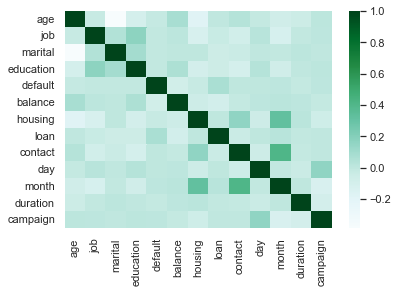

In [12]:
sns.heatmap(df.corr(), cmap='BuGn')

## checking null values

In [13]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

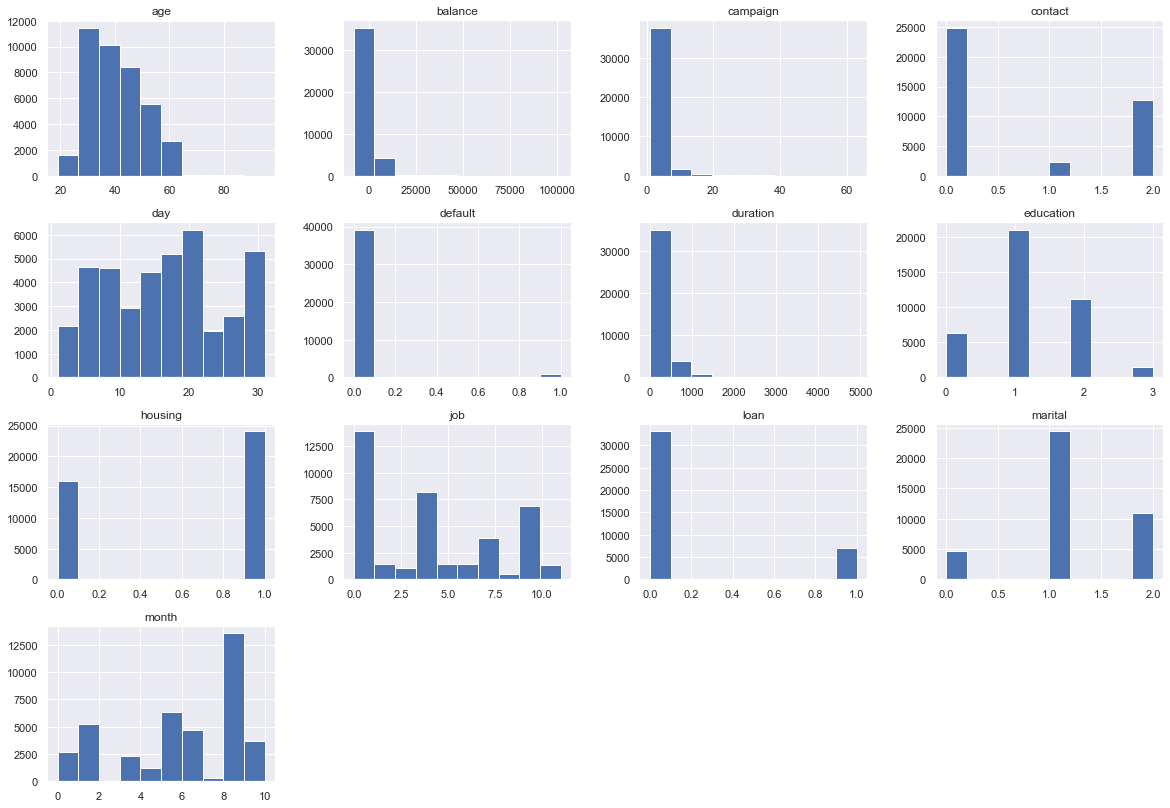

In [14]:
df.hist(figsize=(20,14))
plt.show()

In [15]:
pip install -U seaborn

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


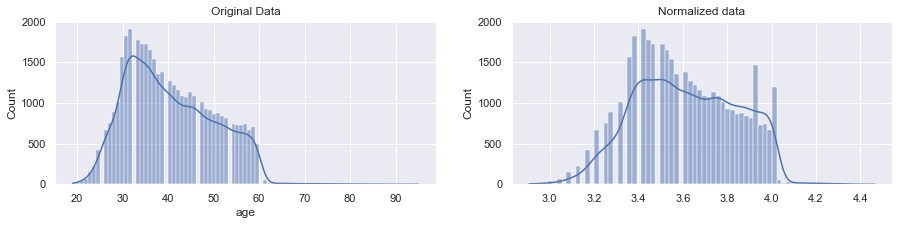

In [15]:
from scipy import stats
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(df['age'])

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df['age'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

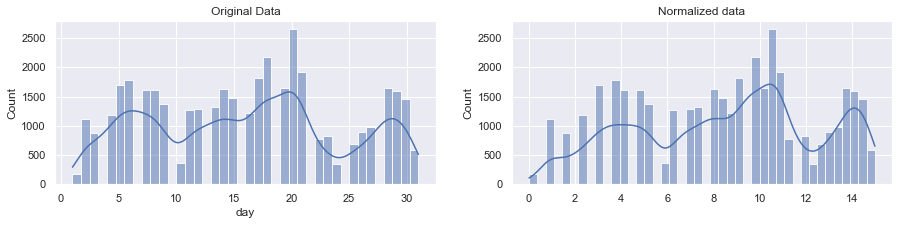

In [16]:
from scipy import stats
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(df['day'])

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df['day'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

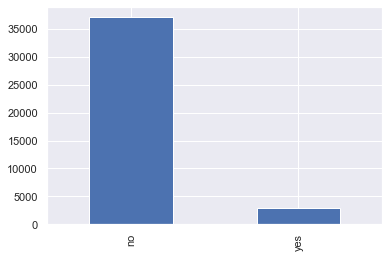

In [18]:
target = df['y']
target.value_counts().plot.bar()

### Data looks pretty imbalance, first we will run the pycaret model on default data sets and hypertune the best model with defult datasets to check the accuracy of model

##  Machine Learning

In [19]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Separate out the features and targets
X = df.drop(columns='y')
y = pd.DataFrame(df['y'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32000, 13)
(8000, 13)
(32000, 1)
(8000, 1)


## Pycaret Module

In [19]:
#load the pycaret module
from pycaret.classification import *
data = df.sample(frac=0.95, random_state=486)
data_unseen = df.drop(df.index)
df.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (38000, 14)
Unseen Data For Predictions: (0, 14)


In [20]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'y',session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(38000, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [21]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.9372,0.9427,0.3644,0.6102,0.4554,0.4244,0.4408,2.0865
1,Light Gradient Boosting Machine,0.9372,0.9464,0.4021,0.5985,0.4799,0.4479,0.4585,0.1941
2,CatBoost Classifier,0.9371,0.9483,0.3943,0.5975,0.4746,0.4427,0.4537,8.3868
3,Extreme Gradient Boosting,0.9354,0.9407,0.4138,0.5729,0.4803,0.4469,0.4537,4.1883
4,Linear Discriminant Analysis,0.9339,0.9291,0.4339,0.5537,0.4858,0.4511,0.4553,0.1082
5,Ridge Classifier,0.9324,0.0000,0.1509,0.6384,0.2428,0.2214,0.2869,0.0151
6,Logistic Regression,0.9322,0.8897,0.2225,0.5829,0.3205,0.2924,0.3311,0.1532
7,Extra Trees Classifier,0.9317,0.9172,0.2193,0.5711,0.3162,0.2877,0.3250,0.4589
8,Random Forest Classifier,0.9315,0.8949,0.2408,0.5616,0.3365,0.3065,0.3376,0.1150
9,Ada Boost Classifier,0.9304,0.9285,0.3207,0.5306,0.3994,0.3648,0.3781,0.5957


### Split data into train and test datasets

In [22]:
#X = df.drop(['y'], axis=1)

#y = df['y']
# split data into training and testing sets

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


## Light Gradient boosting Model with default parameter 

In [24]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [25]:
lgb = LGBMClassifier()

In [26]:
from sklearn.model_selection import GridSearchCV
n_estimators=[100,500,1000]
learning_rate=[0.01,0.1,1]
max_depth=[2,3,5]
num_leaves = [8,27, 125]
params2={'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth,'num_leaves':num_leaves}
grid_lgb=GridSearchCV(lgb,param_grid=params2)

In [25]:
### label encode the categorical values and convert them to numbers 
le = preprocessing.LabelEncoder()
le.fit(df['job'].astype(str))
df['job'] = le.transform(df['job'].astype(str))

le.fit(df['marital'].astype(str))
df['marital'] = le.transform(df['marital'].astype(str))


le.fit(df['education'].astype(str))
df['education'] = le.transform(df['education'].astype(str))


le.fit(df['default'].astype(str))
df['default'] = le.transform(df['default'].astype(str))


le.fit(df['housing'].astype(str))
df['housing'] = le.transform(df['housing'].astype(str))



le.fit(df['loan'].astype(str))
df['loan'] = le.transform(df['loan'].astype(str))


le.fit(df['contact'].astype(str))
df['contact'] = le.transform(df['contact'].astype(str))


le.fit(df['month'].astype(str))
df['month'] = le.transform(df['month'].astype(str))


In [26]:
grid_lgb.fit(X_train,y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [100, 500, 1000],
                         'num_leaves': [8, 27, 125]})

### Light Gradient boosting Model with best parameter

In [27]:
grid_lgb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'num_leaves': 8}

In [28]:
lgbclf=LGBMClassifier(learning_rate=0.1,max_depth=3,n_estimators=500, num_leaves = 8)
lgbclf.fit(X,y)
print(lgbclf.score(X,y))
print(lgbclf.score(X_train,y_train))
print(lgbclf.score(X_test,y_test))


0.9496
0.9499375
0.94825


In [29]:
y_pred=lgbclf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.96      0.99      0.97      7424
         yes       0.71      0.47      0.57       576

    accuracy                           0.95      8000
   macro avg       0.84      0.73      0.77      8000
weighted avg       0.94      0.95      0.94      8000



## Feature Selection of imbalanced datasets

In [31]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X = df.drop(['y'], axis=1)

y = df['y']
# define feature selection
fs = SelectKBest(score_func=f_classif, k=13)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(40000, 13)


In [32]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
#X = df.drop(['y'], axis=1)

#y = df['y']
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[1.645e+01 1.056e+01 3.658e+01 5.658e+01 1.721e+00 3.659e+01 1.184e+02
 3.855e+01 3.239e+02 1.649e+00 1.340e+02 1.080e+04 6.523e+01]
[[  1   2   9 261]
 [  1   2   9 151]
 [  1   2   9  76]
 [  1   2   9  92]
 [  0   2   9 198]]


(32000, 13)
>10 0.928 (0.001)
>50 0.938 (0.002)
>100 0.938 (0.002)
>500 0.936 (0.002)
>1000 0.935 (0.002)


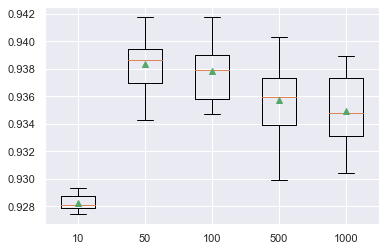

In [33]:
# evaluate lightgbm algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
# Splitting data into training and testing
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# Separate out the features and targets
#X = df.drop(columns='y')


# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)
print(X_train.shape)
# define the model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from matplotlib import pyplot
 
 
# get a list of models to evaluate
def get_models():
	models = dict()
	trees = [10, 50, 100, 500, 1000]
	for n in trees:
		models[str(n)] = LGBMClassifier(n_estimators=n)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [34]:
# Separate out the features and targets
#X = df.drop(columns='y')
#y = pd.DataFrame(df['y'])


### label encode the categorical values and convert them to numbers 
le = preprocessing.LabelEncoder()
le.fit(df['job'].astype(str))
df['job'] = le.transform(df['job'].astype(str))

le.fit(df['marital'].astype(str))
df['marital'] = le.transform(df['marital'].astype(str))


le.fit(df['education'].astype(str))
df['education'] = le.transform(df['education'].astype(str))


le.fit(df['default'].astype(str))
df['default'] = le.transform(df['default'].astype(str))


le.fit(df['housing'].astype(str))
df['housing'] = le.transform(df['housing'].astype(str))



le.fit(df['loan'].astype(str))
df['loan'] = le.transform(df['loan'].astype(str))


le.fit(df['contact'].astype(str))
df['contact'] = le.transform(df['contact'].astype(str))


le.fit(df['month'].astype(str))
df['month'] = le.transform(df['month'].astype(str))

le.fit(df['y'].astype(str))
df['y'] = le.transform(df['y'].astype(str))


### Now we will balance the data through upscaling and then compare the accuracy between balanced and unbalanced data with best model

In [38]:
from sklearn.utils import resample

#setting up testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

#concatenate our training data back together
X1 = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
No = X1[X1.y==0]
Yes = X1[X1.y==1]

# upsample minority
termdeposit_upsampled = resample(Yes,
                          replace=True, # sample with replacement
                          n_samples=len(No), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([No, termdeposit_upsampled])

# check new class counts
upsampled.y.value_counts()

   

1    29680
0    29680
Name: y, dtype: int64

In [39]:
upsampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
14307,32,8,1,2,0,184,1,0,0,14,7,238,3,0
17812,44,7,1,0,0,1109,1,1,0,29,7,176,4,0
11020,37,8,2,2,1,-25,0,0,2,17,8,136,2,0
15158,59,9,1,2,0,6108,1,0,0,17,7,796,2,0
24990,49,8,1,2,0,0,1,0,0,18,2,102,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,55,1,1,1,0,49,1,0,0,7,7,494,4,1
10070,39,8,1,2,0,-190,0,1,2,11,8,893,8,1
24102,35,8,0,2,0,0,1,0,1,29,3,171,1,1
33912,25,8,2,2,0,943,0,0,0,30,0,512,1,1


### Load pycaret model on above balance datasets

In [42]:
#load the pycaret module
from pycaret.classification import *
data = upsampled.sample(frac=0.95, random_state=486)
data_unseen = df.drop(df.index)
upsampled.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (56392, 14)
Unseen Data For Predictions: (0, 14)


In [43]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'y',session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(56392, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [44]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9840,0.9998,0.9987,0.9702,0.9842,0.9680,0.9684,0.5999
1,Random Forest Classifier,0.9726,0.9985,0.9980,0.9498,0.9733,0.9452,0.9464,0.1142
2,Decision Tree Classifier,0.9654,0.9654,0.9987,0.9364,0.9666,0.9308,0.9329,0.1391
3,Extreme Gradient Boosting,0.9438,0.9785,0.9867,0.9088,0.9462,0.8876,0.8909,5.7051
4,CatBoost Classifier,0.9377,0.9745,0.9797,0.9040,0.9403,0.8755,0.8786,8.2279
5,Light Gradient Boosting Machine,0.9264,0.9689,0.9751,0.8888,0.9299,0.8529,0.8570,0.2409
6,K Neighbors Classifier,0.8996,0.9489,0.9830,0.8427,0.9075,0.7992,0.8106,0.0744
7,Gradient Boosting Classifier,0.8869,0.9466,0.9160,0.8658,0.8902,0.7737,0.7751,3.3007
8,Ada Boost Classifier,0.8623,0.9310,0.8604,0.8640,0.8622,0.7246,0.7247,0.9004
9,Ridge Classifier,0.8480,0.0000,0.8146,0.8732,0.8428,0.6960,0.6976,0.0224


In [42]:
lgb = LGBMClassifier()

>50 0.913 (0.002)
>100 0.929 (0.002)
>500 0.964 (0.002)
>1000 0.974 (0.002)


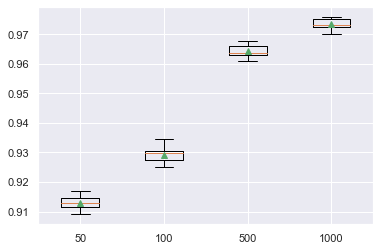

In [43]:
# get a list of models to evaluate
X2 = upsampled.drop(['y'], axis=1)
y2 = pd.DataFrame(upsampled['y'])
def get_models():
	models = dict()
	trees = [ 50, 100, 500, 1000]
	for n in trees:
		models[str(n)] = LGBMClassifier(n_estimators=n)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model,X2, y2, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [40]:
X2 = upsampled.drop(['y'], axis=1)
y2 = pd.DataFrame(upsampled['y'])

In [41]:
lgb = LGBMClassifier()

In [42]:
from sklearn.model_selection import GridSearchCV
n_estimators=[100,500,1000]
learning_rate=[0.01,0.1,1]
max_depth=[2,3,5]
num_leaves = [8,27, 125]
params2={'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth,'num_leaves':num_leaves}
grid_lgb=GridSearchCV(lgb,param_grid=params2)

In [43]:
#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=27)

In [44]:
grid_lgb.fit(X2,y2)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [100, 500, 1000],
                         'num_leaves': [8, 27, 125]})

In [45]:
grid_lgb.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 125}

In [46]:
lgbclf=LGBMClassifier(learning_rate=0.1,max_depth=5,n_estimators=1000, num_leaves = 125)
lgbclf.fit(X2,y2)
y_pred=lgbclf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
#print(lgbclf.score(X2,y2))
#print(lgbclf.score(X2_train,y2_train))
#print(lgbclf.score(X_test,y_test))

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      7424
           1       0.48      0.68      0.56       576

    accuracy                           0.92      8000
   macro avg       0.72      0.81      0.76      8000
weighted avg       0.94      0.92      0.93      8000



## we will see which feature are importancefor prediction for this model. We used SHAP to do so

In [48]:
# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(lgbclf)
shap_values = explainer.shap_values(X_importance)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


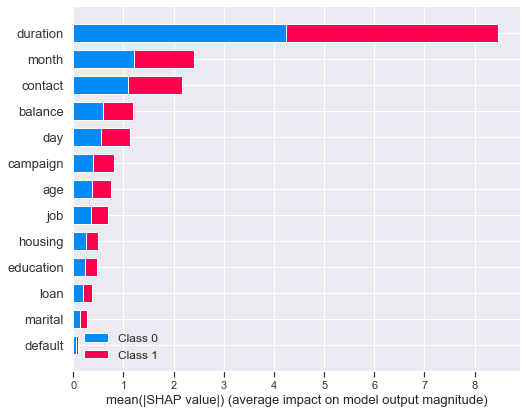

In [49]:
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

### Feature Selection on balanced dataset

In [53]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X = upsampled.drop(['y'], axis=1)

y = upsampled['y']
# define feature selection
fs = SelectKBest(score_func=f_classif, k=13)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
   

(59360, 13)


In [57]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
X3 = upsampled.drop(['y'], axis=1)

y3 = upsampled['y']
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X3, y3)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X3)
# summarize selected features
print(features[0:5,:])

[7.321e+01 1.591e+02 1.888e+02 3.075e+02 7.583e+00 1.581e+02 6.956e+02
 2.151e+02 2.169e+03 7.319e+00 1.143e+01 2.753e+04 4.743e+02]
[[  1   0 238   3]
 [  1   0 176   4]
 [  0   2 136   2]
 [  1   0 796   2]
 [  1   0 102   1]]


### Age, default, house loan, day, month and campaign are important features for the client.  

In [55]:
upsampled.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

### Accuracy with LGBM model went down from 94%(for imbalanced datasets) to 92%(balanced datasets) whereas F1 score increased. 

### DecisionTree Model

In [91]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [94]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X2,y2)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [95]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8641


In [96]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7424
           1       0.33      0.83      0.47       576

    accuracy                           0.86      8000
   macro avg       0.66      0.85      0.69      8000
weighted avg       0.94      0.86      0.89      8000



In [97]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8605
Test set score: 0.8641


In [99]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
# f1 score
f1_score(y_test, y_pred_gini)

0.46741793238608514

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_res, y_res)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [33]:
y_pred3=rfc.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

          no       0.96      0.95      0.95      7424
         yes       0.43      0.53      0.48       576

    accuracy                           0.92      8000
   macro avg       0.70      0.74      0.72      8000
weighted avg       0.92      0.92      0.92      8000



In [103]:
f1_score(y_test, y_pred3)

0.44555444555444557

### Try other upsampling method to improve F1 score

#### SMOTE for upscaling

In [20]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [21]:
X_res.shape

(59360, 13)

In [22]:
type(y_res)

pandas.core.frame.DataFrame

In [27]:
grid_lgb.fit(X_res, y_res)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [100, 500, 1000],
                         'num_leaves': [8, 27, 125]})

In [28]:
grid_lgb.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 125}

In [29]:
lgbclf=LGBMClassifier(learning_rate=0.1,max_depth=5,n_estimators=1000, num_leaves =125)
lgbclf.fit(X_res, y_res)

LGBMClassifier(max_depth=5, n_estimators=1000, num_leaves=125)

In [30]:
y_pred=lgbclf.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.97      0.95      0.96      7424
         yes       0.49      0.60      0.54       576

    accuracy                           0.93      8000
   macro avg       0.73      0.78      0.75      8000
weighted avg       0.93      0.93      0.93      8000



### Undersampling

In [61]:
from imblearn.under_sampling import TomekLinks  
tl = TomekLinks()
X_res5, y_res5 = tl.fit_resample(X_train, y_train)

In [67]:
grid_lgb.fit(X_res5, y_res5)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [100, 500, 1000],
                         'num_leaves': [8, 27, 125]})

In [68]:
grid_lgb.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 27}

In [73]:
lgbclf=LGBMClassifier(learning_rate=0.1,max_depth=5,n_estimators=1000, num_leaves = 8)
lgbclf.fit(X_res5, y_res5)

LGBMClassifier(max_depth=5, n_estimators=1000, num_leaves=8)

In [74]:
y_pred4=lgbclf.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

          no       0.96      0.97      0.97      7424
         yes       0.60      0.51      0.55       576

    accuracy                           0.94      8000
   macro avg       0.78      0.74      0.76      8000
weighted avg       0.94      0.94      0.94      8000



### Our precision and recall both are above 50% by doing undersampling